# Imports
Packages required for experiment

In [1]:
# General use
import torch
import numpy as np
import matplotlib.pyplot as plt


# Extract Data

In [2]:
## Baseline Data ##

# File name
name = 'baseline.pt'
baseline = torch.load(f=name)
# Extract indices and baseline jaccard and dice scores
all_indices = baseline['fold_dict']
baseline_jaccard_score = baseline['baseline_jaccard']
baseline_dice_score = baseline['baseline_dice']
baseline_iterations_object = baseline['baseline_iterations']


splits = ['A', 'B', 'C', 'D', 'E']
partitions = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [3]:
def displayChart(OG_dice, new_dice, baseline_dice, threshold_dice, OG_jaccard, new_jaccard, baseline_jaccard, threshold_jaccard, splits, partitions):
    fig, ax = plt.subplots(2, 1, figsize=(12, 30))
    ax[0].plot(range(len(partitions)), OG_jaccard, label='Original Jaccard', marker='o', markersize=20)
    ax[0].plot(range(len(partitions)), new_jaccard, label='Jaccard after SAS', marker='x', markersize=20)
    ax[0].plot(range(len(partitions)), baseline_jaccard, label='Baseline Jaccard')
    ax[0].plot(range(len(partitions)), threshold_jaccard, label='90% Threshold', linestyle='--')
    ax[0].set_title(f'Split: {splits[i]} Jaccard Scores')
    ax[0].set_xlabel('Data Partition Size')
    ax[0].set_ylabel('Jaccard Score')
    ax[0].set_xticks(range(len(partitions)))
    ax[0].set_xticklabels(partitions)
    ax[0].set_ylim([0, 1])
    ax[0].legend()
    
    # Scatter Dice scores
    ax[1].plot(range(len(partitions)), OG_dice, label='Original Dice', marker='o', markersize=20)
    ax[1].plot(range(len(partitions)), new_dice, label='Dice after SAS', marker='x', markersize=20)
    ax[1].plot(range(len(partitions)), baseline_dice, label='Baseline Dice')
    ax[1].plot(range(len(partitions)), threshold_dice, label='90% Threshold', linestyle='--')
    ax[1].set_title(f'Split: {splits[i]} Dice Scores')
    ax[1].set_xlabel('Data Partition Size')
    ax[1].set_ylabel('Dice Score')
    ax[1].set_xticks(range(len(partitions)))
    ax[1].set_xticklabels(partitions)
    ax[1].set_ylim([0, 1])
    ax[1].legend()
    plt.pause(0.001)
    

# Chart Data

In [4]:
# Initalize lists to store data
baseline_jaccard = []
threshold_jaccard = []
OG_jaccard = []
new_jaccard = []

baseline_dice = []
threshold_dice = []
OG_dice = []
new_dice = []

baseline_iterations = []
OG_iterations = []
new_iterations = []

# Fill baseline list
for parition in partitions:
    baseline_jaccard.append(baseline_jaccard_score)
    baseline_dice.append(baseline_dice_score)
    threshold_jaccard.append(baseline_jaccard_score * 0.9)
    threshold_dice.append(baseline_dice_score * 0.9)
    baseline_iterations.append(baseline_iterations_object)

# Cycle through all models and data points for each
for split in splits:
    # Initialize the arrays
    split_OG_jaccard = []
    split_OG_dice = []
    split_OG_iterations = []
    
    split_new_jaccard = []
    split_new_dice = []
    split_new_iterations = []
    
    for partition in partitions:
        # Load the stored data
        name = f'./new_models/Split:{split}|Partition:{partition}|New'
        data = torch.load(name)
        # Extract data
        split_new_jaccard.append(data['jaccard_score'])
        split_new_dice.append(data['dice_score'])
        split_new_iterations.append(data['num_iterations'])
        split_OG_jaccard.append( data['orig_jaccard_score'])
        split_OG_dice.append(data['orig_dice_score'])
        split_OG_iterations.append(data['orig_iterations'])
    # Store arrays for plotting
    OG_jaccard.append(split_OG_jaccard)
    new_jaccard.append(split_new_jaccard)
    
    OG_dice.append(split_OG_dice)
    new_dice.append(split_new_dice)
    
    new_iterations.append(split_new_iterations)
    OG_iterations.append(split_OG_iterations)
    



    



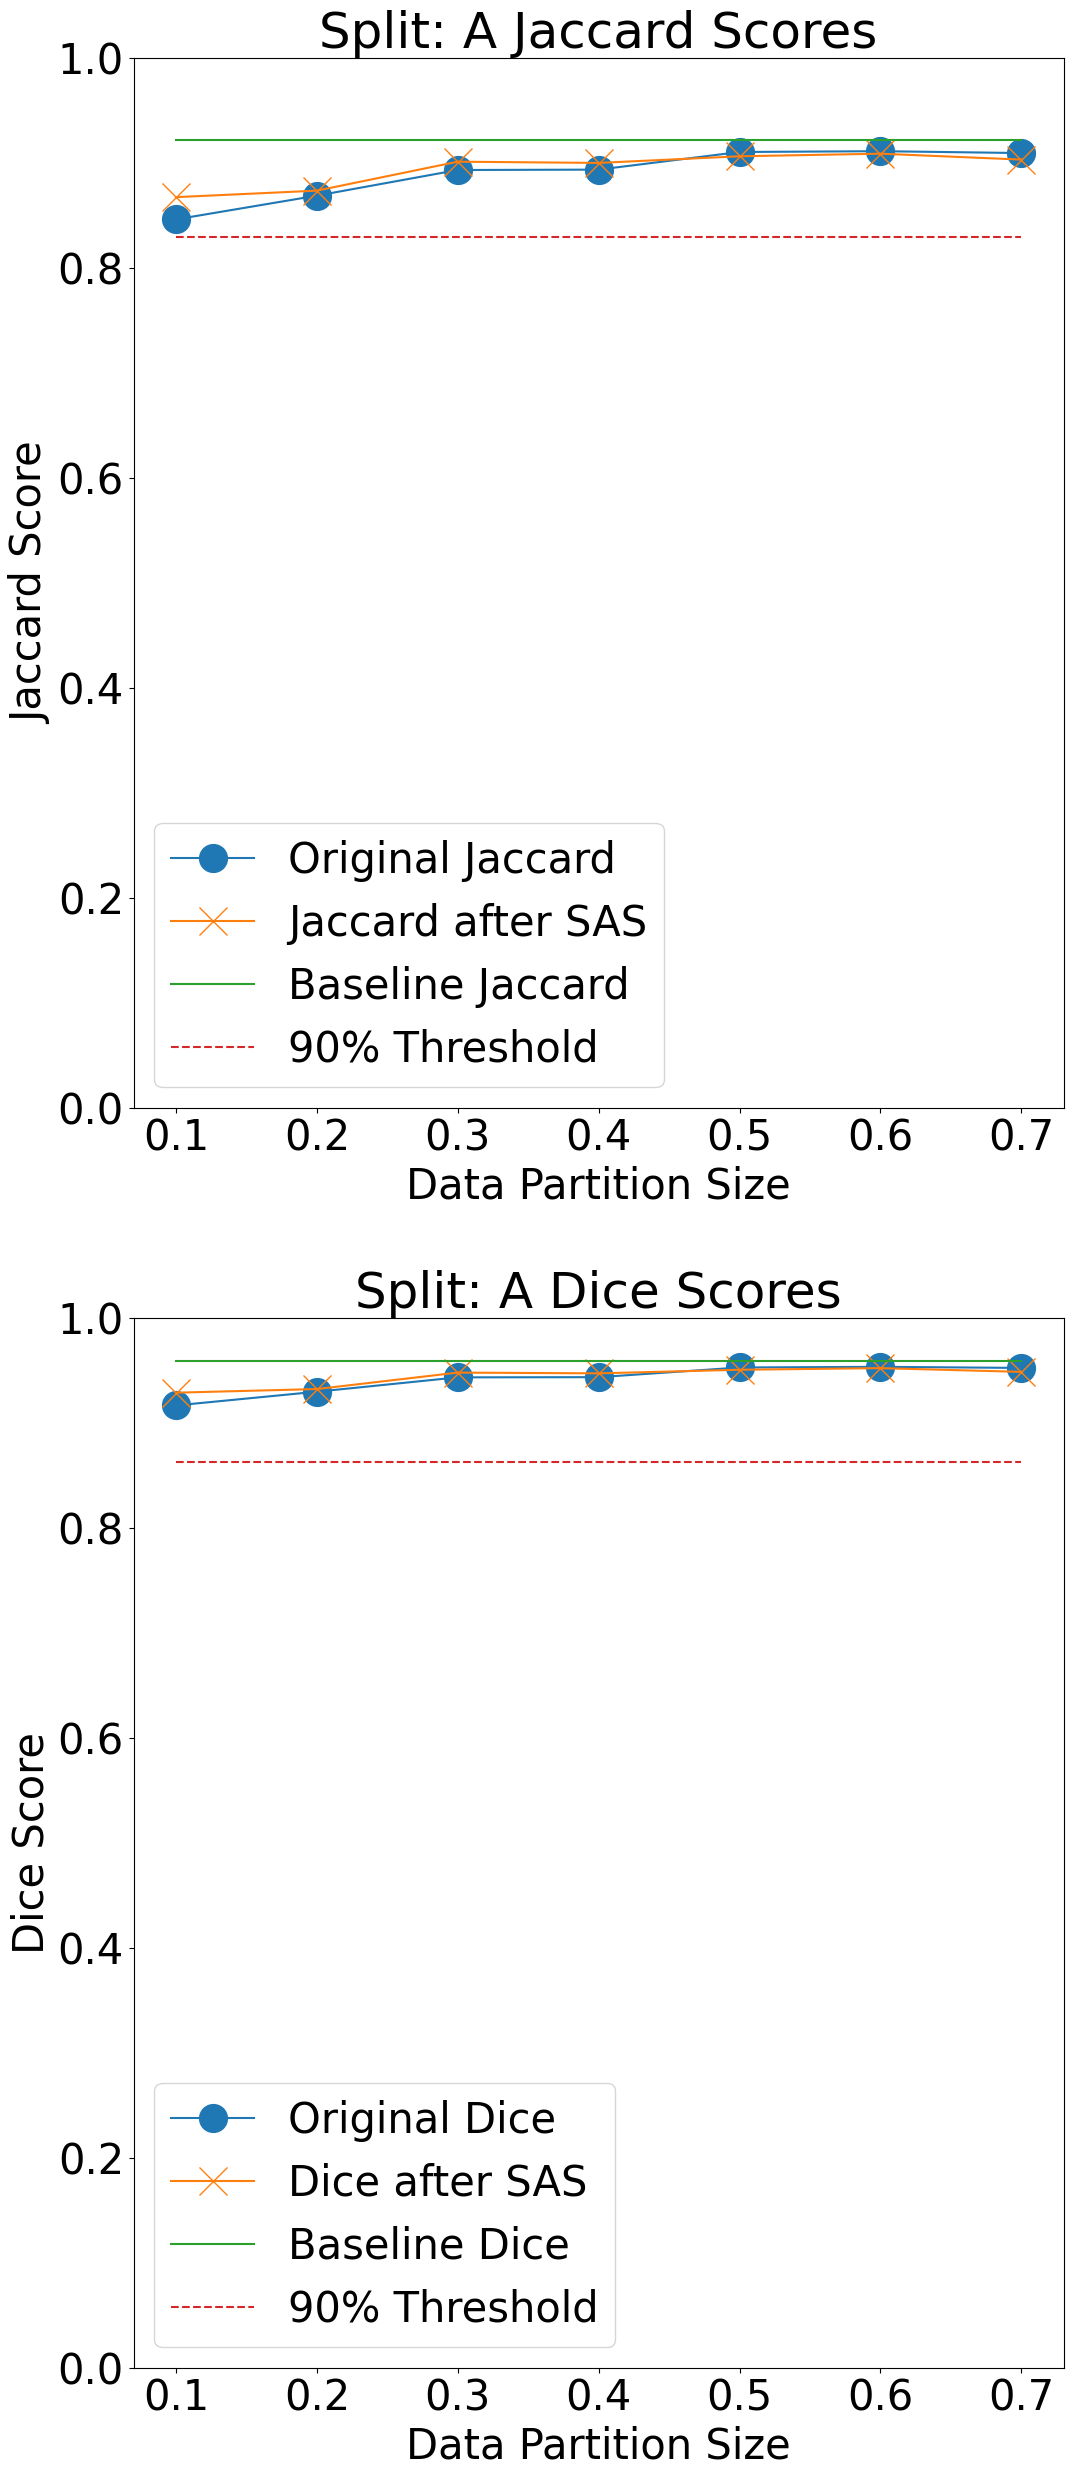

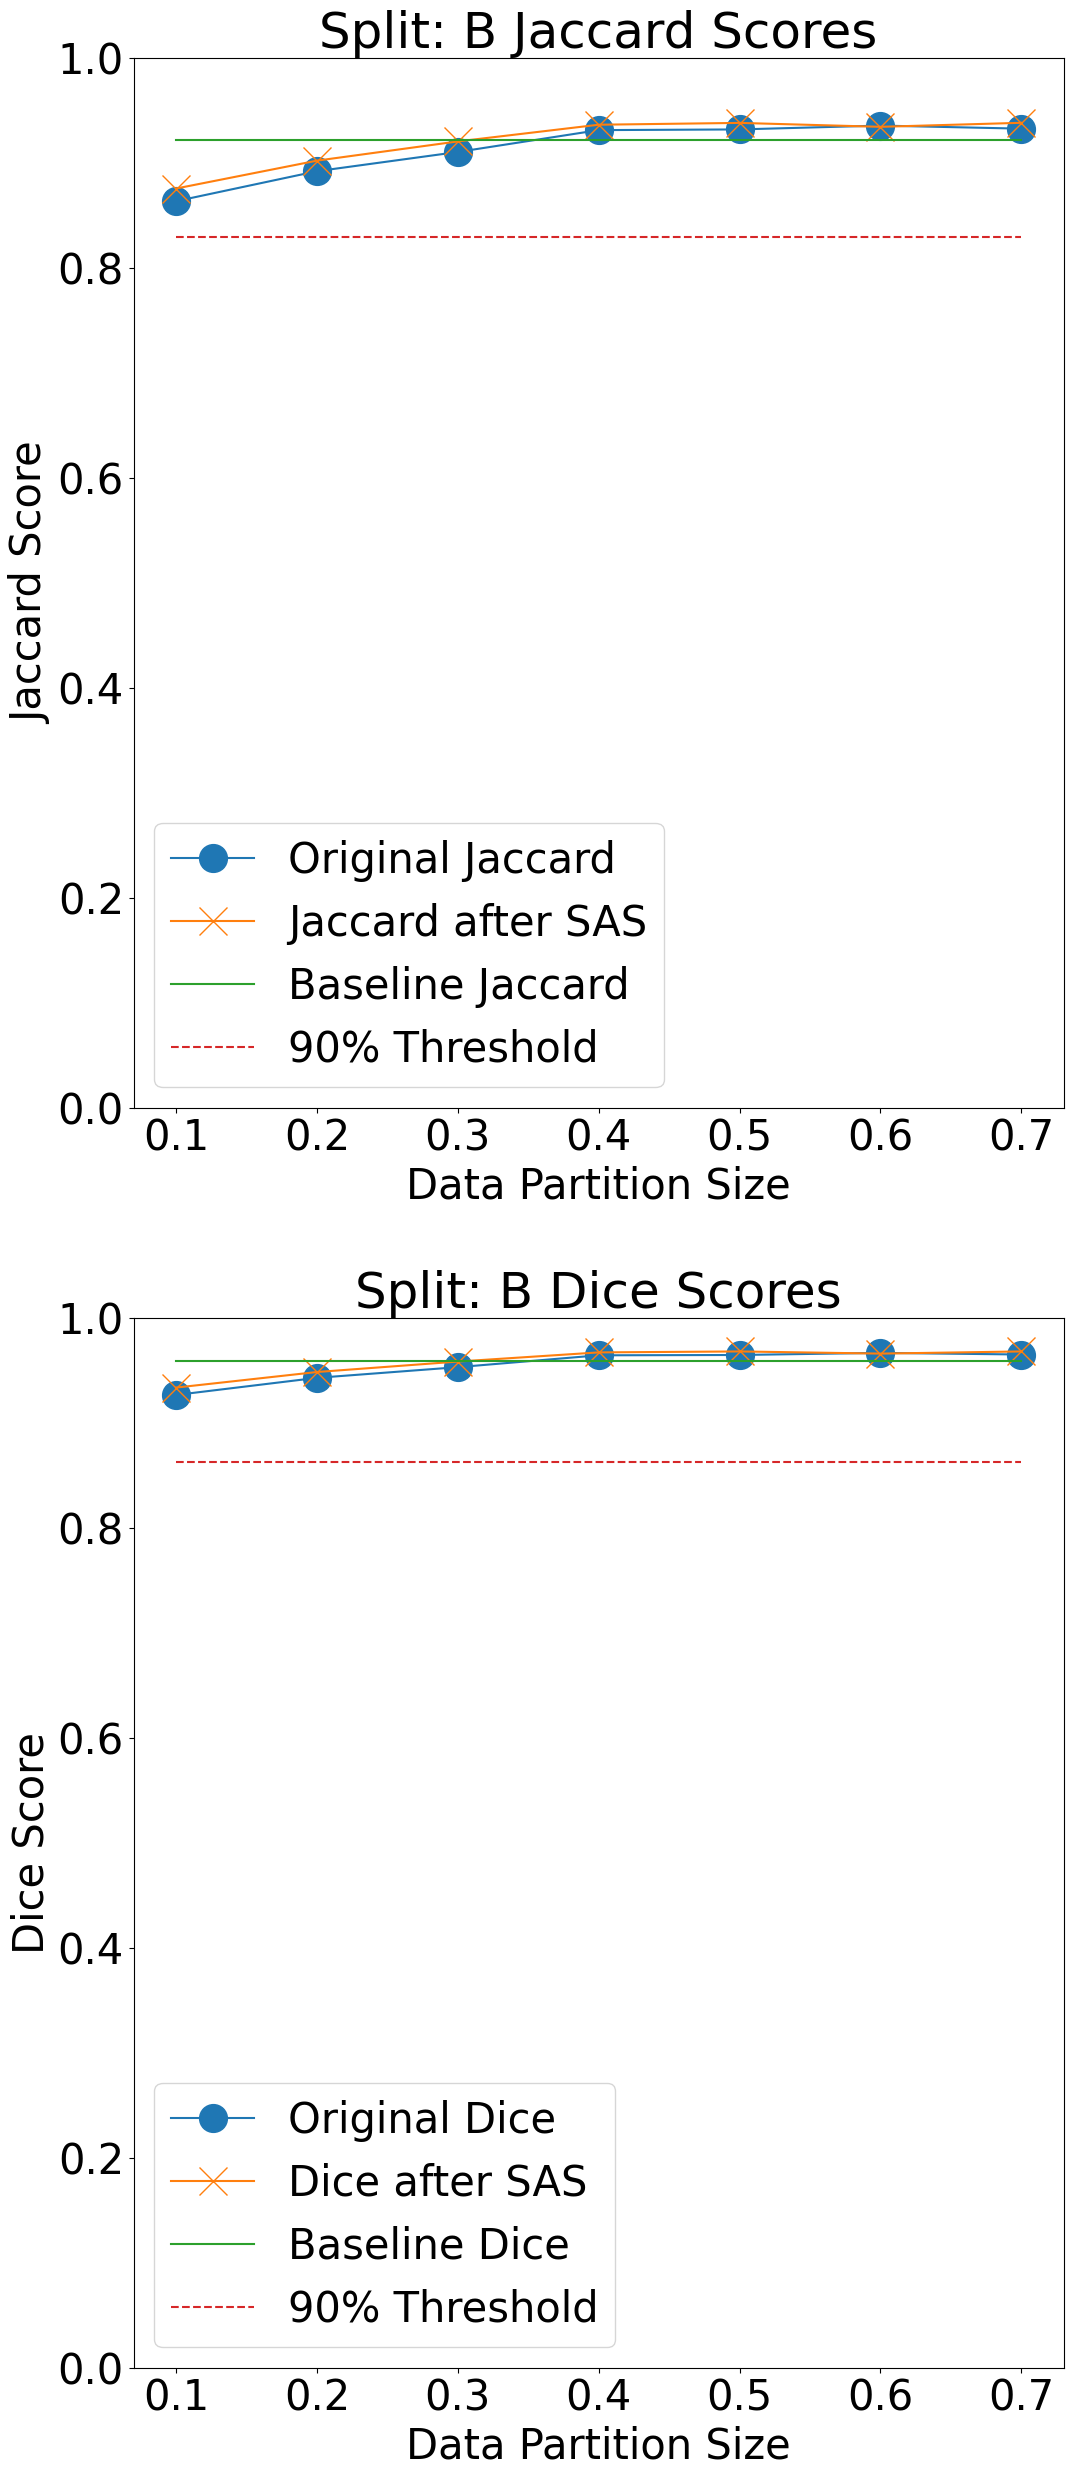

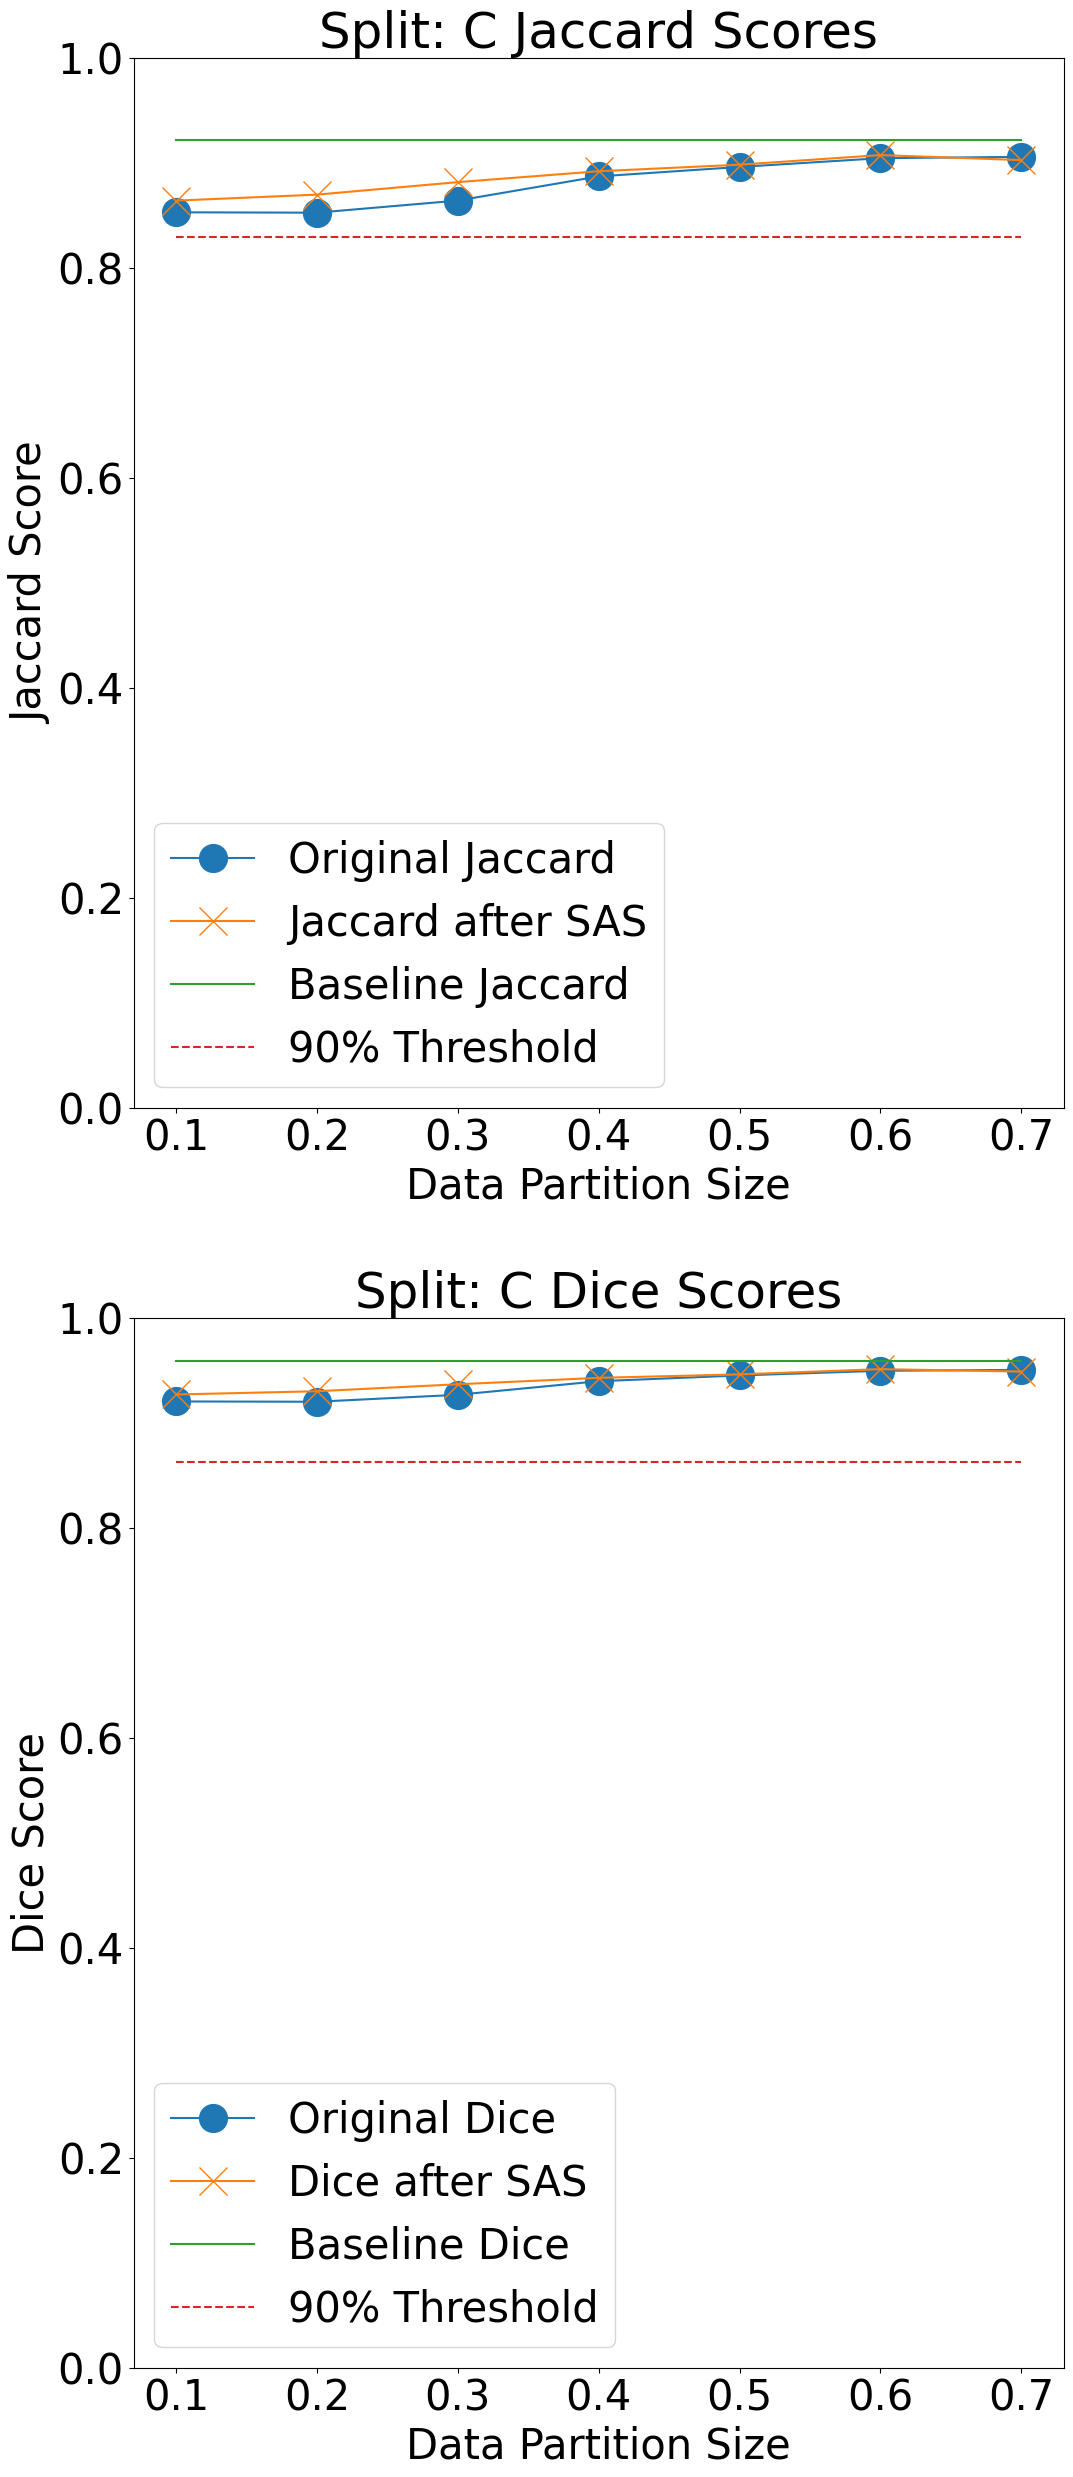

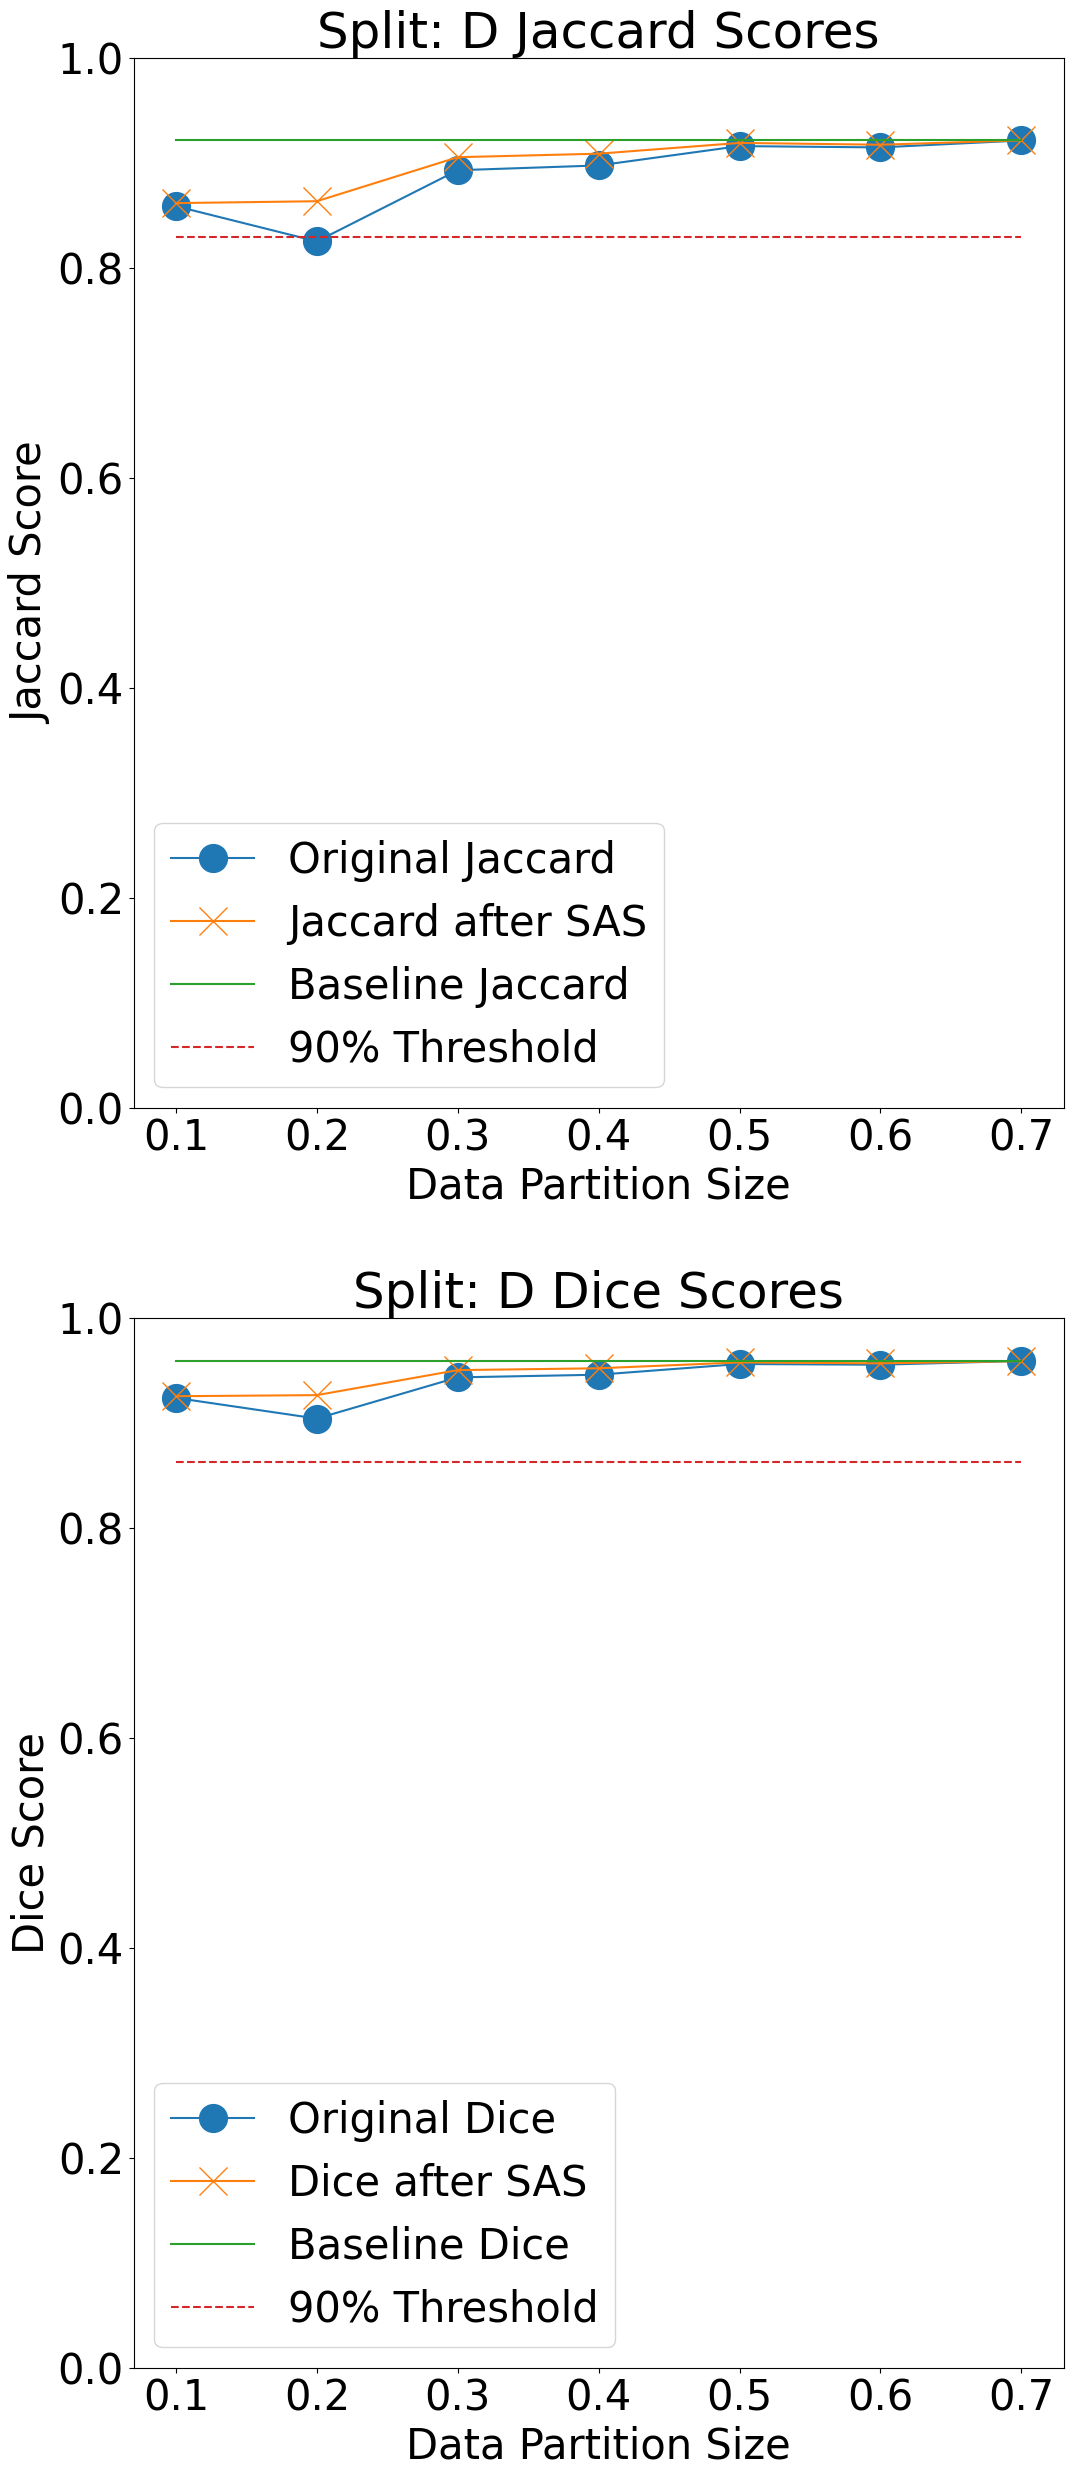

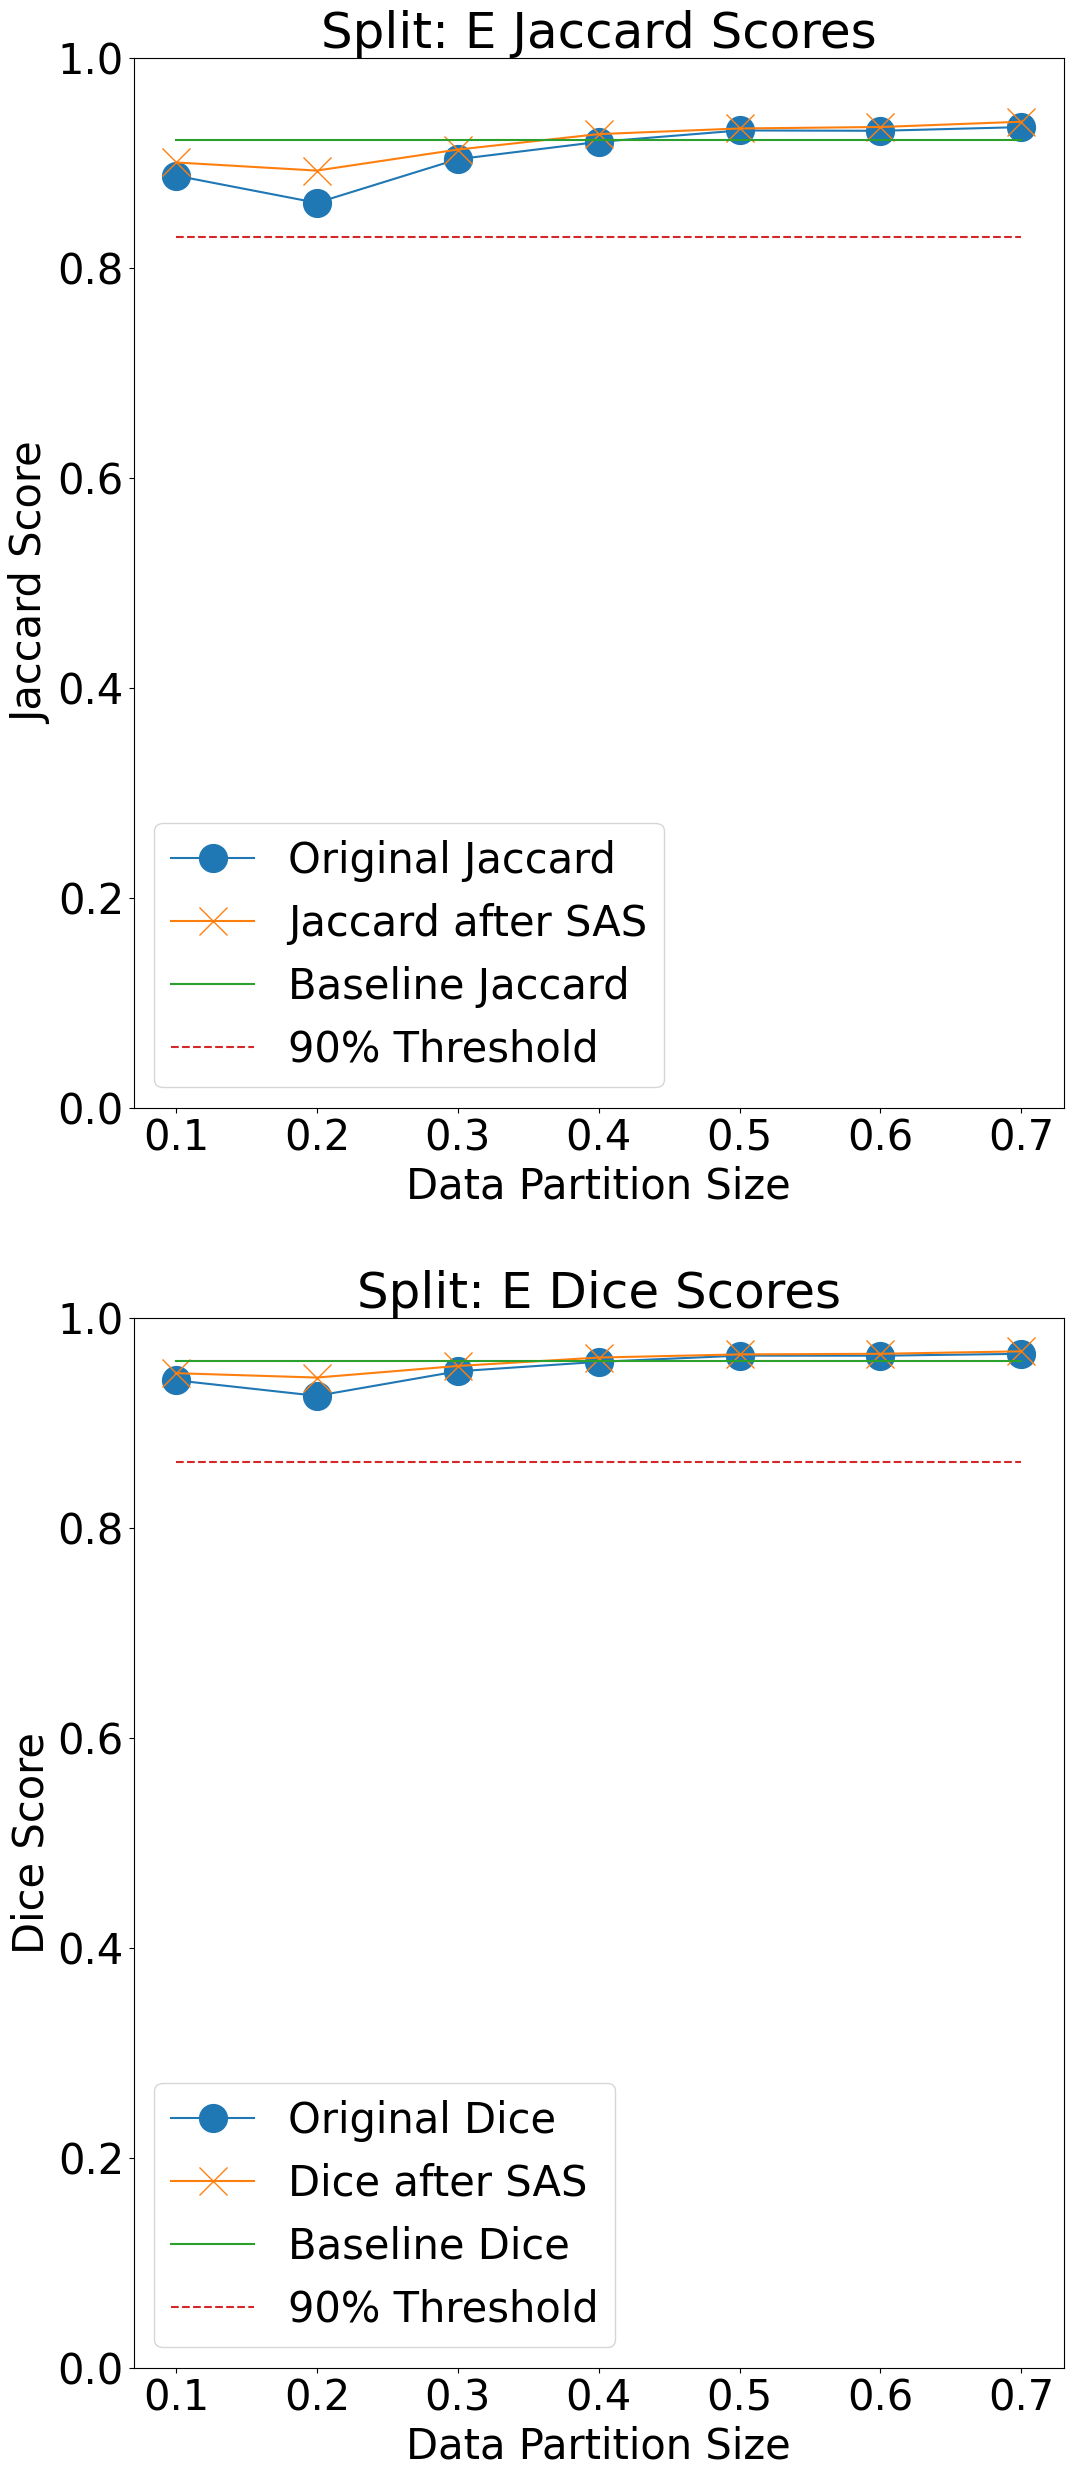

In [5]:
# Cycle through all splits
plt.rcParams.update({'font.size': 30})
for i in range(len(splits)):
    displayChart(OG_dice[i], new_dice[i], baseline_dice, threshold_dice, OG_jaccard[i], new_jaccard[i], baseline_jaccard, threshold_jaccard, splits, partitions)